In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Airbnb_data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Total counts of null in the dataframe
df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Proportion of null in the dataframe
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

last_review                       0.205583
reviews_per_month                 0.205583
host_name                         0.000429
name                              0.000327
id                                0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [ ]:
len(df[pd.isnull(df['last_review']) | pd.isnull(df['reviews_per_month'])])

10052

#48895 ads and 16 attributes
21% of data is missing in the reviews_per_month and last_review columns. The reason why we see same number of missing values in these two columns is because there isn't any reviews for that listing. No data preprocessing is needed as this also is a valuable information. While columns name (listing name) and host_name do have missing data, it only consists of less than 0.1%, so no data processing will be done.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>, <Axes: >, <Axes: >]],
      dtype=object)

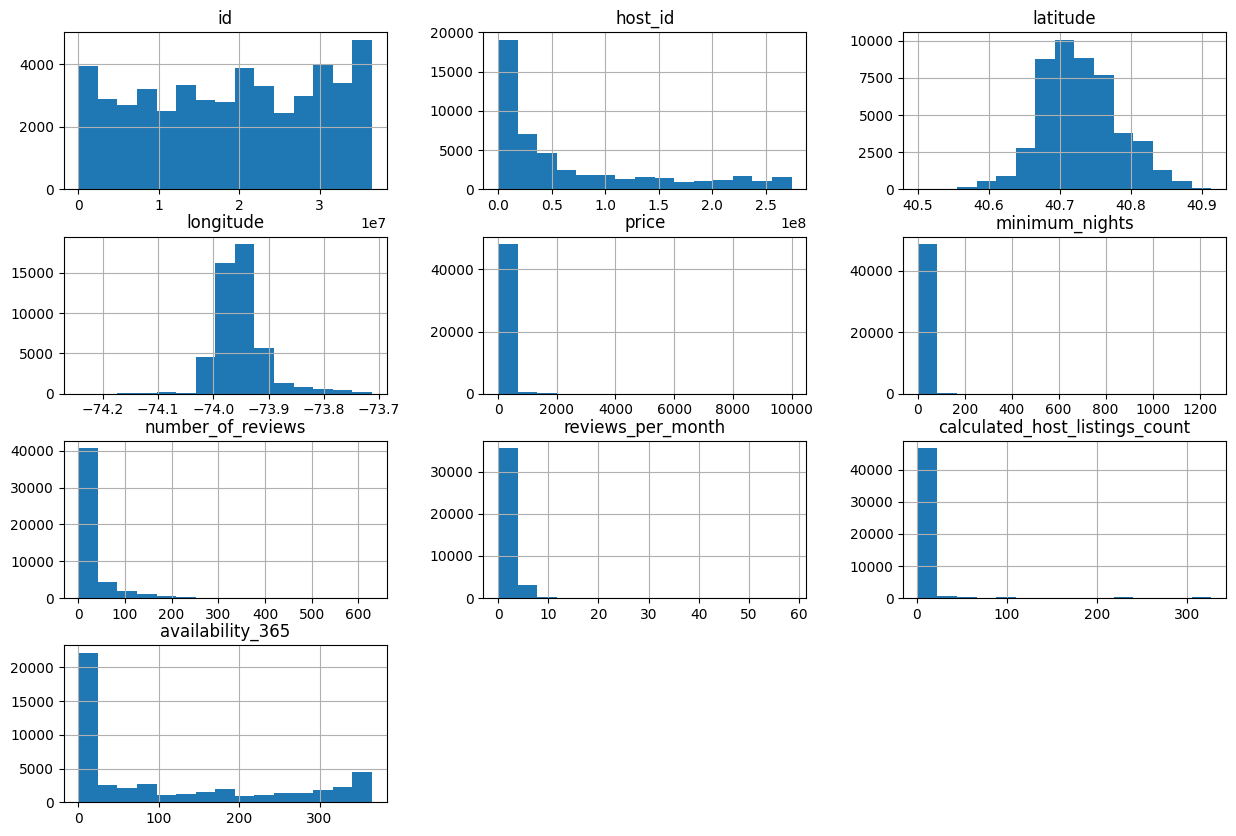

In [ ]:
df.hist(bins=15, figsize=(15,10))

Looking at the latitude and longitude from the prior plots, we see that there are a lot of data that is centered in the histogram. This means that there are large number of properties that are in similar areas. We see that price, minimum nights, number of reviews, reviews per month, and calculated host listing counts, availability of the listing are all skewed to the right. This could mean that we may need to deal with outliers.

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Minimum number of nights is 0 while max number of nights is 1250 nights. Because our project scope is to target travelers who will only stay for short-term. Therefore, we decided to remove listings with minimum number of nights greater than 90 days.

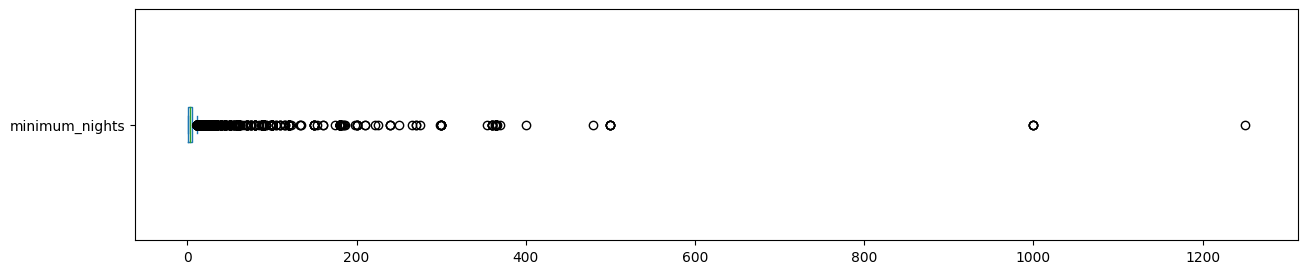

There are 197 listings that have minimum nights above 90 days, which is 0.40% of data


In [ ]:
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()
print(f"There are {len(df[df.minimum_nights > 90])} listings that have minimum nights above 90 days, which is {len(df[df.minimum_nights > 90]) / df.shape[0] * 100:.2f}% of data")

In [ ]:
df=df[df['minimum_nights']<=90]

Upon analyzing the property prices, it was observed that the minimum price was set at 0 dollars, which does not make sense. Therefore, we decided to remove these listings. On the other end of the spectrum, the maximum price was identified as 10,000 dollars, a figure that significantly surpasses the average cost of a 5-star hotel in NYC, which stands at 1,637 dollars per night in 2024. This discrepancy seemed particularly stark given that Airbnb listing data was from 2019. Taking into account inflation and Airbnb's general appeal for its affordability compared to traditional hotel stays, listings priced above 1,500 dollars were deemed excessively expensive and have therefore been excluded from our analysis to maintain a focus on affordability and relevance.

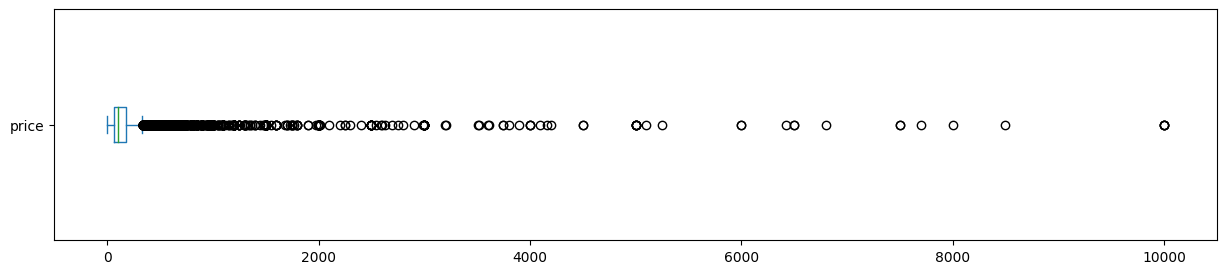

There are 129 listings that have price above 1,500 dollars, which is 0.26% of data


In [ ]:
import matplotlib.pyplot as plt
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()
# check the number of values above 1,500 dollars
print(f"There are {len(df[df.price > 1500])} listings that have price above 1,500 dollars, which is {len(df[df.price > 1500]) / df.shape[0] * 100:.2f}% of data")

In [ ]:
#There are 11 listings with price=0
len(df[df['price']==0])

11

In [ ]:
(11/len(df))*100

0.02258819664051912

In [ ]:
df=df[df['price']<=1500]
df=df[df['price']>0]

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.033572,-0.059162,-0.032941,0.117135,0.116062
minimum_nights,0.033572,1.000000,-0.138475,-0.206079,0.277062,0.219989
number_of_reviews,-0.059162,-0.138475,1.000000,0.549420,-0.072657,0.175290
reviews_per_month,-0.032941,-0.206079,0.549420,1.000000,-0.009509,0.188070
calculated_host_listings_count,0.117135,0.277062,-0.072657,-0.009509,1.000000,0.227305
availability_365,0.116062,0.219989,0.175290,0.188070,0.227305,1.000000


In [ ]:
#We would hash the room types later and private and shared rooms will be hashed in database 0 and entire home/apt will be hashed in database1
df.room_type.value_counts()

room_type
Entire home/apt    25174
Private room       22235
Shared room         1149
Name: count, dtype: int64

In [ ]:
#Checking the price of neighborhood groups to see reasonability of data
df.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        182.935189
Brooklyn         118.913259
Staten Island    101.684636
Queens            95.935963
Bronx             85.442396
Name: price, dtype: float64

For our project, we are going to make the host enter in their listing data. availability_365 which is an indicator of the total number of days the listing is available for during the year, last reviewed date, reviews per month, and number of reviews, calculated_host_listings_count, id will be removed from the finalized data as these are computed from the Airbnb and not the entries that the host will typically type.


In [ ]:
df.to_csv('finalized_data',index=False)